### NAME - OLAWALE OYADEYI
### PROJECT - MODEL TO PREDICT WORKCLASS INCOME 

### Context:


DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are tasked with coming up with a policy framework by looking at the data government got from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government.

### Problem:
The dataset aims to answer the following key questions:

What are the different factors that influence the income of an individual?

Is there a good predictive model for income that exists? What does the performance assessment look like for such a model?


### About the Data 
The Data contains characteristics of the people

- age: continuous - age of a Person

- workclass: Where do a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- fnlwgt: This weight is assigned by the Current Population Survey (CPS). People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics - continuous

- education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- education-num: no. of years a person studied - continuous.

- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- sex: Female, Male.

- capital-gain: Investment gain of the person other than salary - continuous

- capital-loss: Loss from investments - continuous

- hours-per-week: No. of hours a person works - continuous.

- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

In [619]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#to normalize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
from sklearn.metrics import (precision_score,
                           recall_score,
                           f1_score,
                           accuracy_score,
                           precision_recall_curve,
                           roc_auc_score,
                            confusion_matrix,
                            roc_curve, ConfusionMatrixDisplay)

In [620]:
#Function to train a model 
def train(model, x , y):
    '''
    function to train the model and compute accuracy 
    model: model algorithm not yet trained 
    x: Train features
    y: Train Target 
    '''
    trained_model = model.fit(x,y)
    preds = trained_model.predict(x)
    acc = accuracy_score(y, preds)
    print(f"Train Accuracy: {acc}")
    return trained_model 

In [621]:
#Function to evaluate 
def evaluate (model, x, y, threshold = 0.5):
    """ function to evaluate our trained model with different metrics 
    model : Trained Model (classifier)
    
    x:validation features 
    y: Target in validation data 
    Threshold: Value to filter predictions 
    """
    
    pred_proba = model.predict_proba(x)[:, 1] #This will return x 2 array where the 2 is column with prob for the 
    pred_class = np.round(pred_proba  > threshold ) #This converts to 0 or 1 
    acc = accuracy_score (y, pred_class)
    recall = recall_score(y, pred_class)
    precision = precision_score (y, pred_class)
    f1 = f1_score (y, pred_class)
    
    df = pd.DataFrame({ "Accuracy": acc, 
                       "Precision": precision, 
                       "Recall":recall,
                       "F1" : f1}, index = [0])
    conf = confusion_matrix(y, pred_class, labels = [0,1]) ##If the class is more than 2, then use 0, 1, 2 
    disp = ConfusionMatrixDisplay (conf, display_labels = [0,1]) #If the class is more than 2, then use 0, 1, 2 
    disp.plot()
    plt.show()
    return df 

In [622]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram
    


# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [623]:
#Function to detect and treat Outliers 
def outlier_treat(df, col):
    lower = df[col].quantile(0.25)
    upper = df[col].quantile(0.75)
    iqr = upper - lower
    
    lower_clip = lower - 1.5 * iqr
    upper_clip = upper + 1.5 * iqr
    
    df[col] = np.clip(df[col], lower_clip, upper_clip)
    return df

def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = outlier_treat(df, c)

    return df 

### EXPLORATORY DATA ANALYSIS

In [624]:
df = pd.read_csv("who_data.csv")
df.head(100)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [625]:
#Determine the shape of the Data 
df.shape

(32561, 15)

In [626]:
#Comfirm missing values
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

In [627]:
#determine duplites 
df.duplicated().sum()

24

In [628]:
#Drop duplicates 
df.drop_duplicates(inplace = True)

In [629]:
#Reconfirm duplicates 
df.duplicated().sum()

0

In [630]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32537 non-null  int64 
 1   workclass               32537 non-null  object
 2   fnlwgt                  32537 non-null  int64 
 3   education               32537 non-null  object
 4   education_no_of_years   32537 non-null  int64 
 5   marital_status          32537 non-null  object
 6   occupation              32537 non-null  object
 7   relationship            32537 non-null  object
 8   race                    32537 non-null  object
 9   sex                     32537 non-null  object
 10  capital_gain            32537 non-null  int64 
 11  capital_loss            32537 non-null  int64 
 12  working_hours_per_week  32537 non-null  int64 
 13  native_country          32537 non-null  object
 14  salary                  32537 non-null  object
dtypes:

In [631]:
df['relationship'].value_counts()

 Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [632]:
#statistical summary of the numerical data  
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education_no_of_years,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital_gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital_loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


### Summary of Data 

- As can seen from the statistical Data summary, Minimum age for the sample Data is 17years with 32537samples; mid-Age is 37years and maximum Age is 90years 

- Minimum no of studied year for the Data sample is 1year and the maximum is 16years 

- The minum and maximum working hours for this sample Data is 1hr and 99hrs per week respctively  


In [633]:
num_df = df.select_dtypes(include = 'number')
num_feat = num_df.columns.to_list()
num_feat

['age',
 'fnlwgt',
 'education_no_of_years',
 'capital_gain',
 'capital_loss',
 'working_hours_per_week']

In [634]:
cat_df = df.select_dtypes(include = 'object')
cat_feat = cat_df.columns.to_list()
cat_feat

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary']

In [635]:
for col in cat_feat: 
    print(col + ' has '+ str(cat_df[col].nunique()) + 'unique values which are:' + str(cat_df[col].unique()))
    print('\n')
    print(round(cat_df[col].value_counts(normalize=True)*100,2).map(str)+'%')
    print('\n')

workclass has 9unique values which are:[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


 Private             69.68%
 Self-emp-not-inc     7.81%
 Local-gov            6.43%
 ?                    5.64%
 State-gov            3.99%
 Self-emp-inc         3.43%
 Federal-gov          2.95%
 Without-pay          0.04%
 Never-worked         0.02%
Name: workclass, dtype: object


education has 16unique values which are:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


 HS-grad         32.25%
 Some-college    22.38%
 Bachelors       16.45%
 Masters          5.29%
 Assoc-voc        4.25%
 11th             3.61%
 Assoc-acdm       3.28%
 10th             2.87%
 7th-8th          1.98%
 Prof-school      1.77%
 9th              1.58%
 12th             1.33%
 Doctorate        1.27%
 5th-6

### Deduction

Below are deduction of each Data column: 

- WorkClass 

1. We can deduce from the workClass group that the people in the private unit tends to be more dominant with about 70% of total sample 
2. There is a category with "?" which seem not to depict a group; this will be deleted to as proportion is about 6% of total work class samples 

- Eduaction 

1. For the Education column, the HS-group had the highest people in the subclass folowed by the some-colleg and the bachelors 

- Marital Status 

1. Partnes with a civil right has the highest number in the sample with total percentage (Married-civ-spouse) with total percentage of 46% 

- Occupation 

For the occupation column, the pro-specialty, craft-repair and Executive Managerial is of highest category eith average of 12%; Also, it does have a blank entry which cant be tied to a particular class ; hence will be removed from category based on its small proportion   


- Native Country 

Samples were from different native countries with larger value to United State; blank entry attributed to this attribute; hence will be removed for better modelling   


In [636]:
## Calculate the salary ratio of the two salary bands 
df["salary"].value_counts(normalize = True)

 <=50K    0.759074
 >50K     0.240926
Name: salary, dtype: float64

### Deduction

- We can see that there are about 75% of the total sample in the lower income class and less in the higher income class  

### DATA  CLEANING 

###### workclass Column 

In [637]:
df.workclass.to_list()

[' State-gov',
 ' Self-emp-not-inc',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Self-emp-not-inc',
 ' Private',
 ' Private',
 ' Private',
 ' State-gov',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Self-emp-not-inc',
 ' Private',
 ' Private',
 ' Self-emp-not-inc',
 ' Private',
 ' Private',
 ' Federal-gov',
 ' Private',
 ' Private',
 ' Local-gov',
 ' Private',
 ' ?',
 ' Private',
 ' Private',
 ' Local-gov',
 ' Private',
 ' Private',
 ' Federal-gov',
 ' State-gov',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Self-emp-not-inc',
 ' Private',
 ' Self-emp-not-inc',
 ' Private',
 ' Private',
 ' Private',
 ' Federal-gov',
 ' Private',
 ' Private',
 ' State-gov',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Federal-gov',
 ' Self-emp-inc',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' ?',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Private',
 ' Self-emp-inc',
 ' ?',
 ' Private',
 ' 

In [638]:
df[df['workclass']== ' ?']

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [639]:
df.drop(df[df['workclass']== ' ?'].index, inplace= True)
df.drop(df[df['occupation']== ' ?'].index, inplace= True)
df.drop(df[df['native_country']== ' ?'].index, inplace= True)

#### VISUALIZATION 

In [640]:
columns = list(df)[:-1]
df[columns].head(3)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States


In [641]:
#df[columns].hist(stacked = False, bins = 100, figsize = (12,30), layout = (14, 2))
#plt.tight_layout();

In [642]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

In [643]:
num_feat

['age',
 'fnlwgt',
 'education_no_of_years',
 'capital_gain',
 'capital_loss',
 'working_hours_per_week']

#### UNIVARIATE PLOTTING 

In [644]:
from utils import histogram_boxplot, labeled_barplot

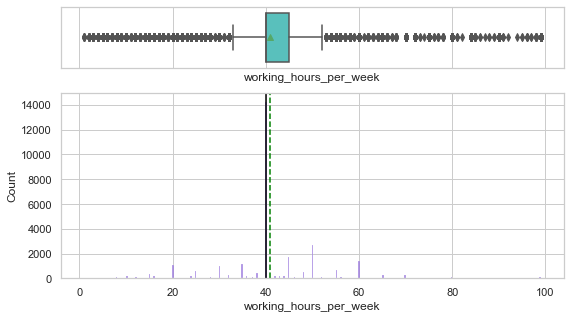

In [645]:
histogram_boxplot(data = df, feature = 'working_hours_per_week' )

### Categorical Plots

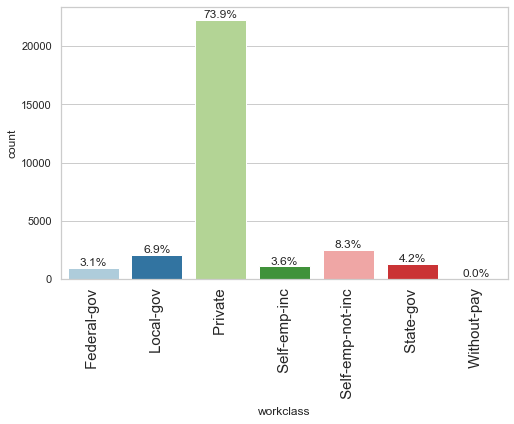

In [646]:
labeled_barplot(df, "workclass", perc=True)

#it is seen that almost 70% of the working class in the society work in a private owned company  

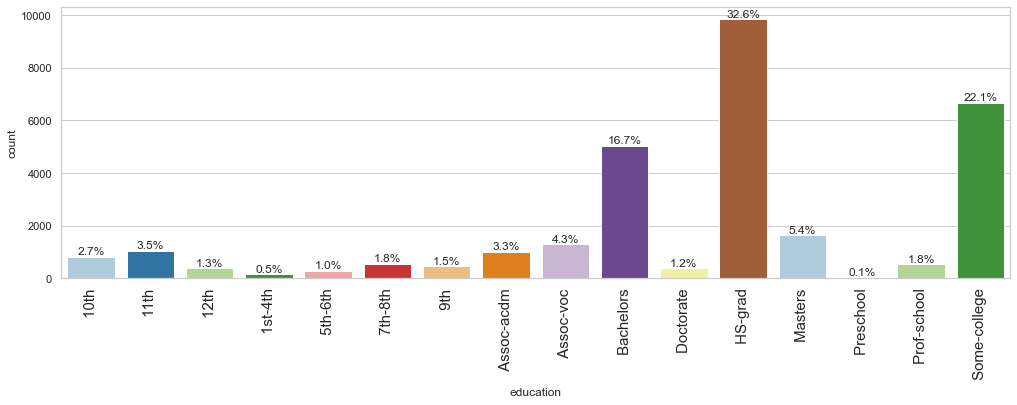

In [647]:
labeled_barplot(df,"education", perc=True)


### Deduction 

The Data gave an indication that we have got a large number of people in the society with High school grad level of Education; in second order is the college and followed by the Barchelors level of education 

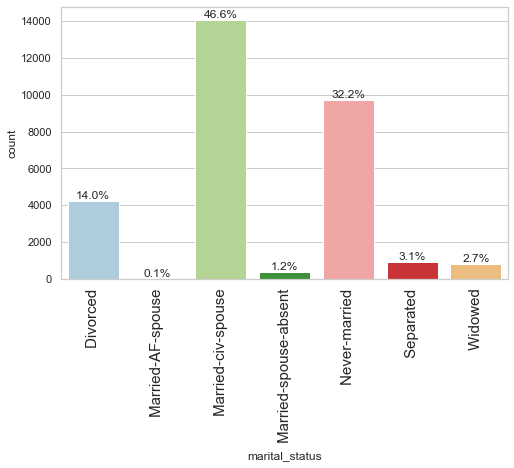

In [648]:
labeled_barplot(df,"marital_status", perc=True)

#### Deduction 

It can be seen from the graph that we have  ore legally married partner to anyother category in the data with about 46% of the total sample  

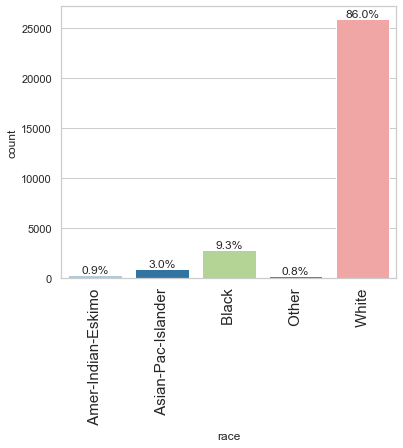

In [649]:
labeled_barplot(df,"race", perc=True)

### Deduction 

A typical society where race applies for this society is predomianantly white  

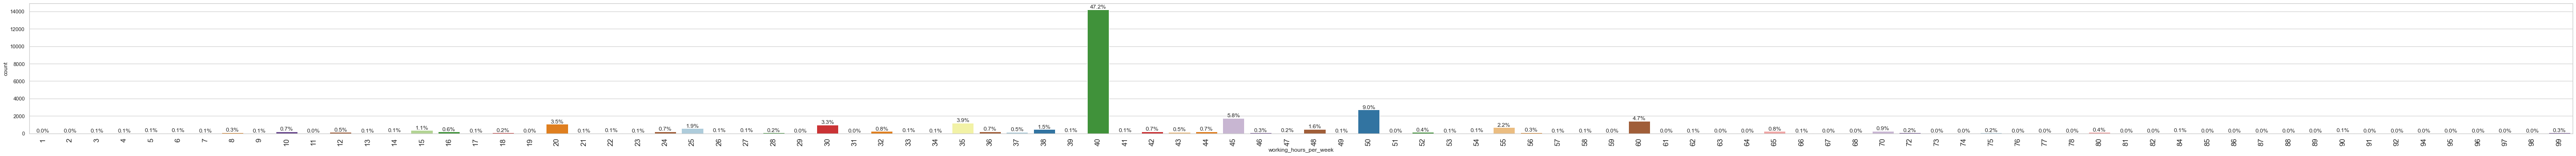

In [650]:
labeled_barplot(df,"working_hours_per_week", perc=True)

### Deduction

40hrs Maximum worked hoursis the limit  seen for a week; however, the graph do  ot show how this proportionate to the income  



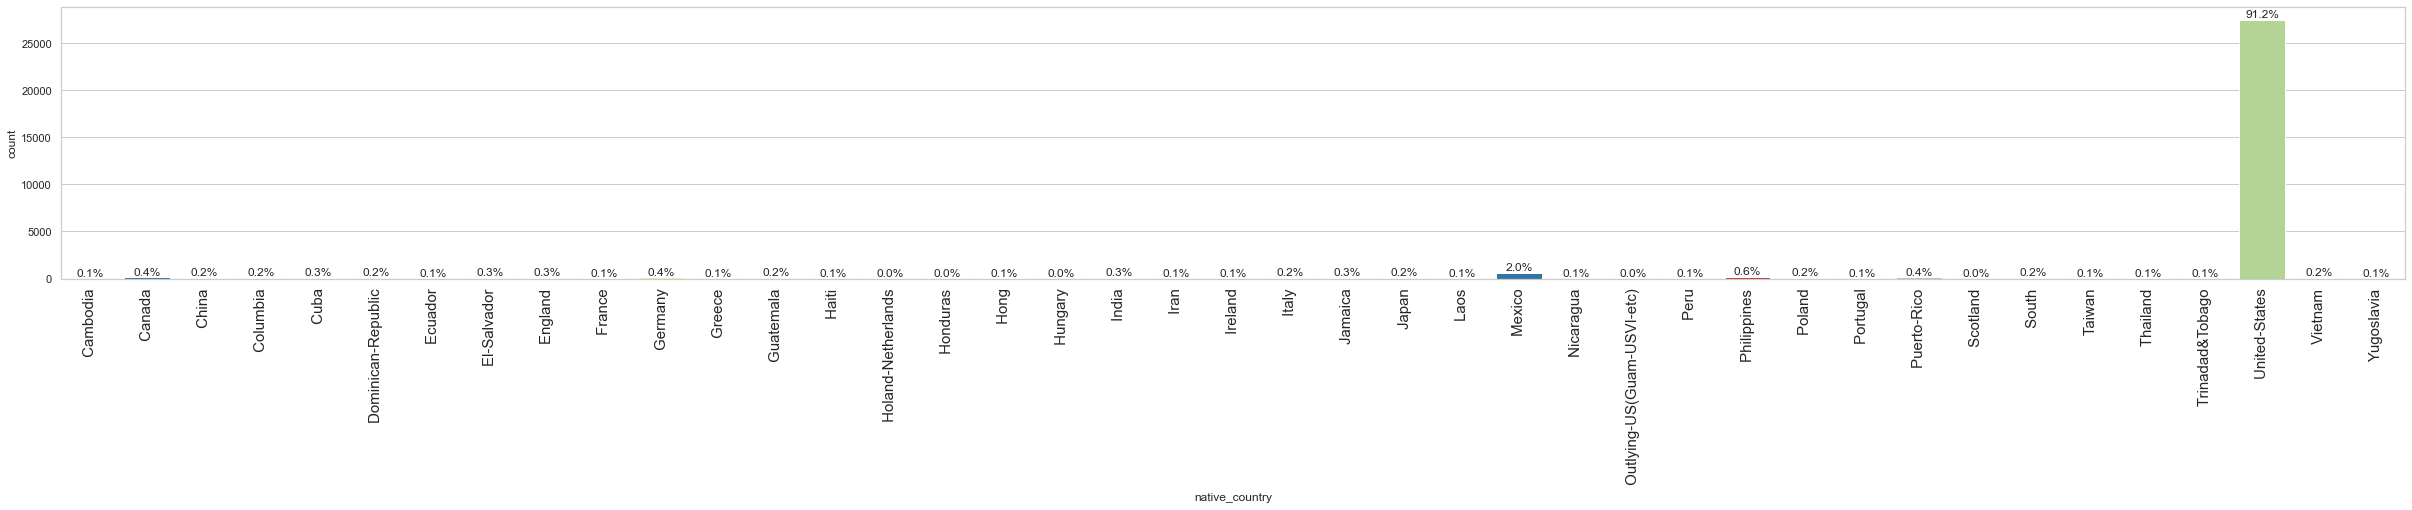

In [651]:
labeled_barplot(df,"native_country", perc=True)

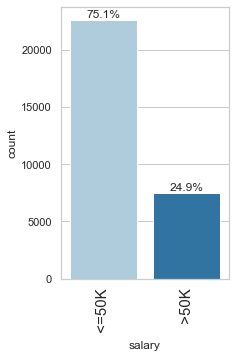

In [652]:
labeled_barplot(df,"salary", perc=True)

### Deduction 

From deduction, it is clear that those who earn little are much compared to the b etter class 

#### BIIVARIATE PLOTTING 

In [653]:
#sns.boxplot(data = df, x = "salary", y = "occupation")

In [654]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

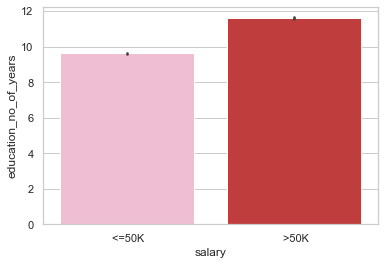

In [655]:
#barplot for one numerical and one categorical 
sns.set_theme(style="whitegrid")

tips = sns.load_dataset("tips")

ax = sns.barplot(x="salary", y="education_no_of_years", data=df, palette="tab20_r" ) 

#### Deduction 

Its also seen that education number of years invariably improve the salary band falling in the economically rich class  

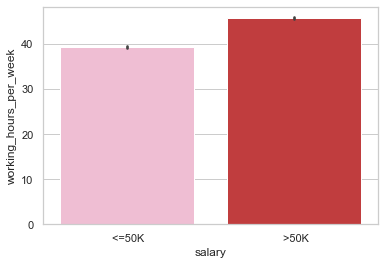

In [656]:
#barplot for one numerical and one categorical 
sns.set_theme(style="whitegrid")

tips = sns.load_dataset("tips")

ax = sns.barplot(x="salary", y="working_hours_per_week", data=df, palette="tab20_r" ) 

#### Deduction 

It is clear that the number of hours has got no influence in the salary range holding all other factors constant.  

In [657]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

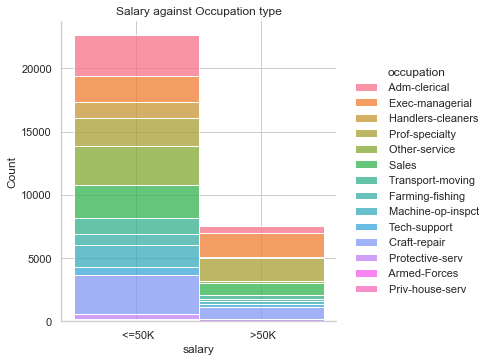

In [658]:
sns.displot(data = df, x = df["salary"], hue = df['occupation'], multiple = "stack" )
plt.title("Salary against Occupation type");


### Deduction 

- Its clear that we have people who hold managerial position, Admin cleric, Handlers-cleaners, profoessional specialtiess roles and still earn little, they fall more in the lower salary band; 
a tip to look into the level of eductaion for this top roles in this kind of economy  to see if education can influence their pay. 

- For this kind of Economy, we have got managerial position, Admin cleric, Handlers-cleaners, profoessional specialties, other services
sales saturate the market and with high pay rate.  

- Its also clear that there seem to be more of Managerial roles, professional specialty, 




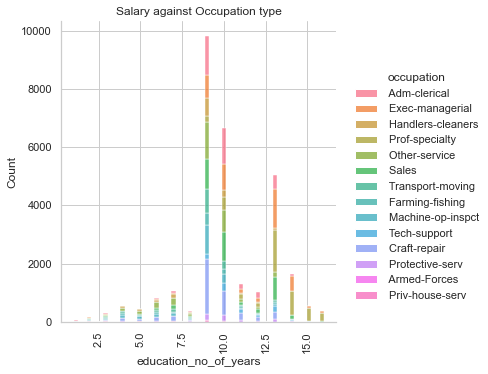

In [659]:
sns.displot(data = df, x = df["education_no_of_years"], hue = df['occupation'], multiple = "stack" )
plt.xticks(rotation = 90)
plt.title("Salary against Occupation type");

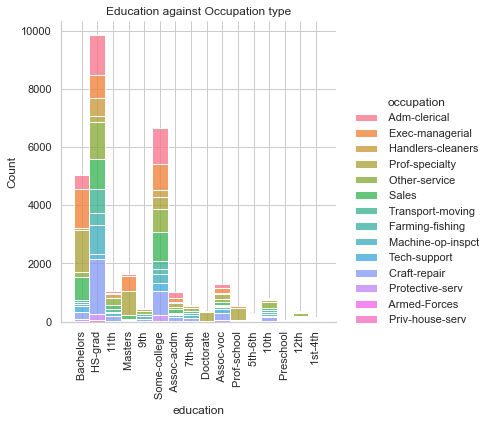

In [660]:
sns.displot(data = df, x = df["education"], hue = df['occupation'], multiple = "stack" )
plt.xticks(rotation = 90)
plt.title("Education against Occupation type");

### Deduction 
Its clear that the top job hunt is between the some college with 10yrs no of education; Bachelors(13) and HS-grad(9).


In [661]:
df_salary_high = df[df['salary']== ' >50K' ]
print (len(df_salary_high))
print (len(df))

7506
30139


In [662]:
#Proportion of High salary earners to total poupulation  
Proportion_high_sal = len(df_salary_high)/ len(df)
Proportion_high_sal

0.24904608646604068

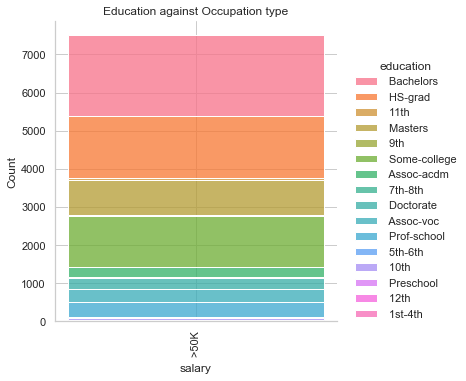

In [663]:
sns.displot(data = df, x = df_salary_high['salary'],  hue = df['education'], multiple = "stack" )
plt.xticks(rotation = 90)
plt.title("Education against Occupation type");

### Deduction 

It is clear that holding a Bachelors degree at minimum gives a very high chance of holding a job with salary greater that minimum cap   

### Identify Correlation 

In [664]:
df.corr().T

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week
age,1.000000,-0.076279,0.043203,0.080162,0.060141,0.101348
fnlwgt,-0.076279,1.000000,-0.045199,0.000420,-0.009755,-0.023033
education_no_of_years,0.043203,-0.045199,1.000000,0.124455,0.079613,0.152842
capital_gain,0.080162,0.000420,0.124455,1.000000,-0.032255,0.080429
capital_loss,0.060141,-0.009755,0.079613,-0.032255,1.000000,0.052380
working_hours_per_week,0.101348,-0.023033,0.152842,0.080429,0.052380,1.000000


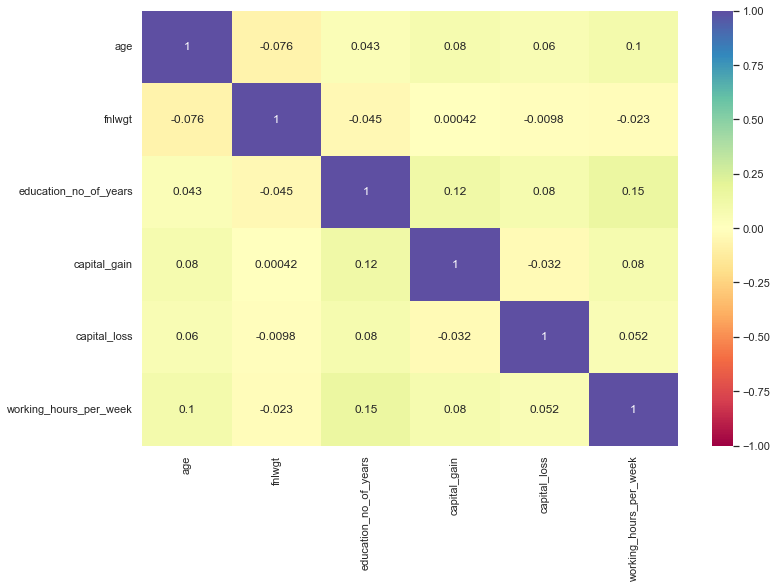

In [665]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, vmin =-1, vmax = 1,cmap = "Spectral"); 

### Deduction from the Multivariate Plotting 

- It can be deduced that there exist no multicollinearity between the variables 

### Outliers detection and treatment 

In [666]:
num_feat

['age',
 'fnlwgt',
 'education_no_of_years',
 'capital_gain',
 'capital_loss',
 'working_hours_per_week']

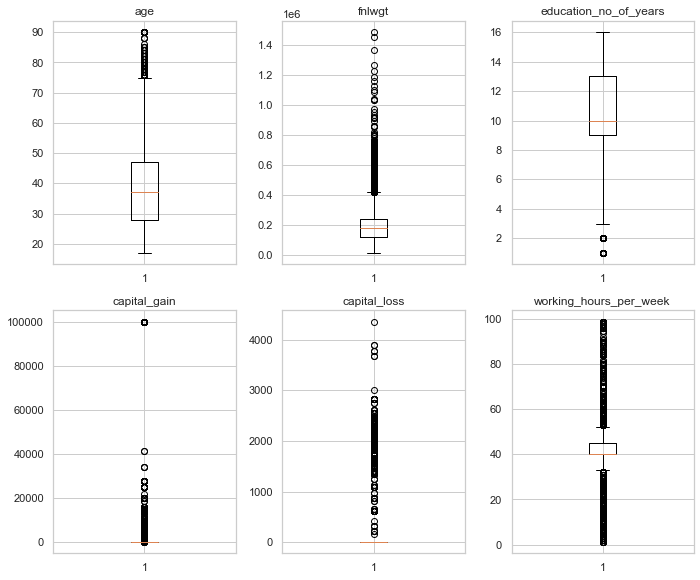

In [667]:
#creat a figure and set the figsize
plt.figure(figsize=(10,20))

#for each of the columns, itirate to create a boxplot

for ind, var in enumerate(num_feat):
    #create a subplot
    plt.subplot(5, 3,ind + 1)# gridspec_kw=ind + 1)
    plt.tight_layout()  # to avoid the title from overlapping
    plt.boxplot(df[var])
    plt.title(var)

####  Deduction 
As can see; there are outliers in the upper whisker for the demographic characteristics weight and the Age; lower outlier for the 
no of education by year and outlier in the upper and lower whisker for the working hours per week; also, a few outliers for the capital gain and loss 

In [668]:
#Outlier treatment 
df = treat_outliers_all(df, num_feat)
df.head(3)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


In [669]:
cat_feat

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary']

In [670]:
cat_feat

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary']

In [671]:
df

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,32.5,United-States,<=50K


In [672]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [673]:
df['salary'].replace([' <=50K', ' >50K'], [0, 1], inplace = True) 

In [674]:
#label_encoder object
#label_encoder =LabelEncoder()
#Encode labels in column. 
#le_data = label_encoder.fit_transform(df[['salary']])
#df_le = pd.DataFrame(le_data, columns = ['salary'])


In [675]:
#ohe = OneHotEncoder()
#ohe_data=ohe.fit_transform(df[['workclass','education','marital_status','occupation','relationship','race','sex','native_country','salary']]).toarray() 
#feature_names = ohe.get_feature_names(['workclass','education','marital_status','occupation','relationship','race','sex','native_country','salary'])
#df_ohe = pd.DataFrame(ohe_data, columns = feature_names)
#df_new_ohe = pd.concat([df_num,df_ohe,df_le], axis = 1)
#df_new_ohe
#df_ohe



#### BUILD MODEL 

In [676]:
x = df.drop('salary', axis = 1)
y = df['salary']

In [677]:
x

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,32.5,United-States


In [678]:
# creating dummy variables
x = pd.get_dummies(x, drop_first=True)
x

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39.0,77516.0,13.0,0.0,0.0,40.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50.0,83311.0,13.0,0.0,0.0,32.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,257302.0,12.0,0.0,0.0,38.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40.0,154374.0,9.0,0.0,0.0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

## Build model using Logistic Regression 

###### normalise 

In [679]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

###### build model 

In [680]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_sc, y_train)

LogisticRegression()

In [681]:
#THis is the training and testing accuracy on both the teste and the train but of concern is majorly on the test except for underfitting and overfitting  
print("Train Performace: {:.3f}".format(log_reg.score(x_train_sc, y_train)))
print("Test Performace: {:.3f}".format(log_reg.score(x_test_sc, y_test)))

Train Performace: 0.833
Test Performace: 0.832


### PERFORMANCE BASED ON METRIC 

In [682]:
log_reg_model = train(log_reg, x_train_sc, y_train)

Train Accuracy: 0.8326420572376607


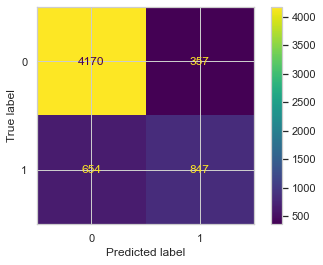

,Accuracy,Precision,Recall,F1
0,0.832283,0.703488,0.56429,0.626248


In [683]:
log_reg_df = evaluate (log_reg_model, x_test_sc, y_test)
log_reg_df

Out of 1,511 in the Data whose salary is above 50K dollars; the model only predicted 847people correctly giving a recall of 56%; hence model need be optimized as performance score on recall poor 

### MODEL IMPROVEMENT FROM ROC  USING THE AUC SCORE  

In [684]:
preds = log_reg_model.predict_proba(x_test_sc)[:, 1]

In [685]:
auc = roc_auc_score(y_test, preds)

In [686]:
auc

0.8839181948798732

#### Deduction 

Approximately, 88% of the time, the model will distinguish between those who have salary less than 55k dollars and those higher or equal to  

In [687]:
def draw_roc_curve(model, x, y):
    """
    Function to create ROC curve 
    
    Model: Trained Model 
    x: Trained or validation features 
    y: Target in the test data 
    
    """
    preds = model.predict_proba(x)[:, 1]
    auc = roc_auc_score(y, preds)
    fpr, tpr, thres = roc_curve(y_test, preds)
    plt.figure(figsize = (7,5))
    plt.plot(fpr, tpr, label = f" logistic regression {auc:2f}")
    plt.plot ([0,1], [0,1], "r--")
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve")
    plt.legend(loc = "lower right")
    plt.show()
    return thres, tpr, fpr

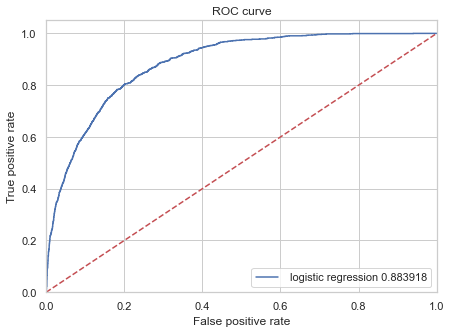

In [688]:
thres, tpr, fpr = draw_roc_curve( log_reg_model,  x_test_sc,  y_test);

In [689]:
thres

array([1.96835996e+00, 9.68359958e-01, 9.54013019e-01, ...,
       2.35048116e-03, 2.34166258e-03, 2.29478690e-07])

In [690]:
optimal_indx  = np.argmax(tpr - fpr) 
optimal_indx

914

In [691]:
optimal_thres = thres[optimal_indx]
optimal_thres 

0.2856944460223366

#### RE EVALUATE AT OPTIMUM VALUES OF THRESHOLD 

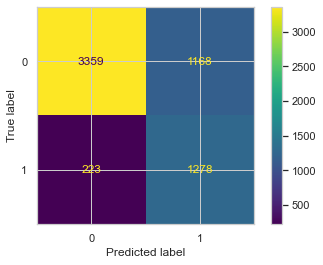

,Accuracy,Precision,Recall,F1
0,0.769244,0.522486,0.851432,0.64758


In [692]:
evaluate (log_reg_model, x_test_sc, y_test,  0.22780215776273335)

Upon evaluation, Out of 1,511 in the Data whose salary is above 50K dollars; the model only predicted 1278people correctly giving a recall of 85%; a more better performance 

#### MODEL IMPROVEMENT FROM MODEL HYPERPARAMETERS

In [693]:
import random

random.seed(10)
c_val = np.random.rand(5,2).flatten() #Flatten makes it a single line values or a single row 
c_val

array([0.59114238, 0.46674073, 0.92191985, 0.20526297, 0.82143923,
       0.91978823, 0.14314005, 0.81895542, 0.55140918, 0.47403356])

In [694]:
accs = []
for c in c_val:
    model = LogisticRegression (C = c)
    model.fit(x_train_sc, y_train)
    acc = model.score(x_test_sc, y_test)
    accs.append(acc)

In [695]:
# value for c
optimal_idx = np.argmax(accs)
optimal_c = c_val[optimal_idx]
optimal_c

0.591142380653363

In [696]:
log_reg_c = LogisticRegression(random_state = 0, C= optimal_c)

In [697]:
log_reg_c_model = train(log_reg_c, x_train_sc, y_train)

Train Accuracy: 0.8326939029448361


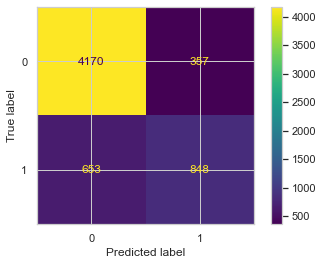

,Accuracy,Precision,Recall,F1
0,0.832449,0.703734,0.564957,0.626755


In [698]:
df_c = evaluate (log_reg_c_model , x_test_sc, y_test)
df_c

Based on the recall score, optimazation with threshold outstands it; so cant be recommended for deployment  

#### MODEL IMPROVEMENT FROM DATA 

In [699]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler 

In [700]:
def balance_data (x, y, smote_type):
    """x: Train features 
    y: Train Target 
    smote_ type : Kind of imbalance strategy 
    """
    x_res, y_res  = smote_type.fit_resample(x,y) 
    #Depending on the balancing technique,  x_res will be complemented by set of artficial data based on oversampling or any technic and our y_res will be also be balanced by same art datas 
    #If for Under samplimg x_res might be reduced fro a class to balance same for the other class  
    return x_res, y_res


In [701]:
under = RandomUnderSampler(random_state = 0)
over = RandomOverSampler(random_state = 0)
smote = SMOTE(random_state = 0)
adasyn = ADASYN(random_state = 0)

In [702]:
#Recall, its the train sets that will always require the balancing and scaling since its like a base line for predicting othher unseen data like the test sets 
x_train_un, y_train_un = balance_data(x_train_sc, y_train, under )
x_train_ov, y_train_ov = balance_data(x_train_sc, y_train, over )
x_train_sm, y_train_sm = balance_data(x_train_sc, y_train, smote )
x_train_ada, y_train_ada = balance_data(x_train_sc, y_train, adasyn)

In [703]:
#This is to confirm undersample as the y-class for the two classes will have equal proportion of the class 
from collections import Counter 

Counter(y_train_un)

Counter({0: 4804, 1: 4804})

#### undersampling 

Train Accuracy: 0.8127601998334721


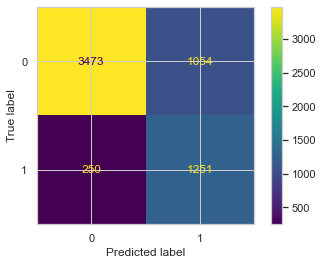

,Accuracy,Precision,Recall,F1
0,0.783676,0.542733,0.833444,0.657383


In [704]:
log_reg_un = train(log_reg, x_train_un, y_train_un)
df_un = evaluate(log_reg_un, x_test_sc, y_test)
df_un

#### oversampling 

Train Accuracy: 0.8103079259872963


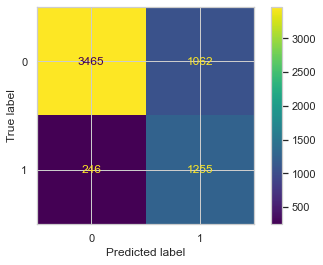

,Accuracy,Precision,Recall,F1
0,0.783013,0.541649,0.836109,0.657412


In [705]:
log_reg_ov = train(log_reg, x_train_ov, y_train_ov)
df_ov = evaluate(log_reg_ov, x_test_sc, y_test)
df_ov

#### smote

Train Accuracy: 0.8147611157138912


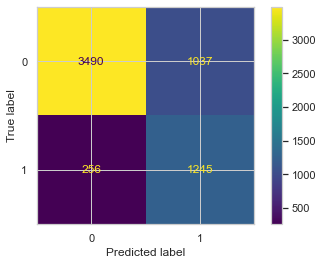

,Accuracy,Precision,Recall,F1
0,0.785501,0.545574,0.829447,0.658208


In [706]:
log_reg_sm = train(log_reg, x_train_sm, y_train_sm)
df_sm = evaluate(log_reg_sm, x_test_sc, y_test)
df_sm

#All the model improvement from data resulted to an average score on recall of 83%. Specifically  Oversampling which topped in rank; Out of 1,511people in the Data whose salary is above 50K dollars; the model only predicted 1255people correctly giving a recall of 83.6%. 

The different factors that influences the income of an individul is based 

-The level of Education It is clear from the plots during analysis that the higher the level oif Education; there tend to be a very high chance of getting a job with a better pay.
More people in the barchelors, HS-grad and Masters tend to saturate the market and in high level positions 

-Education no of years  - The level of education is in proportion to the level of Education; hence tends to give a high chanmge of income 

-Work hours in aweek - The time to work in a week also increase profitability.  

Model for deployment 

- Model improvement from Data using the Oversampling optimisation approach in Logistics regression willbuild a better model with an improved score in recall of 83% 